# Laboratorio di Fondamenti dell'elaborazione di segnali e immagini 2022: Skin Detection con l'ausilio di OpenCV
A cura di Camillo Ballestrasse, con la collaborazione di Lorenzo Brizzi

In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

 L'obiettivo primario di questo laboratorio è stato il realizzare una procedura di skin detection che operi in uno spazio di colore in modo da produrre un'immagine binaria: sono stati utilizzati due spazi di colore, HSV e YCrCb.
 Ulteriori obiettivi sono stati:
 - Comprendere un metodo base di classificazione binaria a livello di pixel
 - Applicare tecniche di post-processing sull'immagine binaria con l'ausilio di filtri morfologici.

Sono state scelte tre immagini a cui applicare questa metodologia di Skin Detection.
Successivamente, ho confrontato ed analizzato foto con porzioni di pelle e foto prive di pelle.

## Importiamo le immagini
Utilizzando poi una sfocatura per poter migliorare il confinamento dei pixel su immagini con poca risoluzione.
Dopo averle importate, vengono poi convertite in scala di grigio, ossia immagini contenenti un solo canale di colore, poichè cv2.imread le mostra in scala BGR.

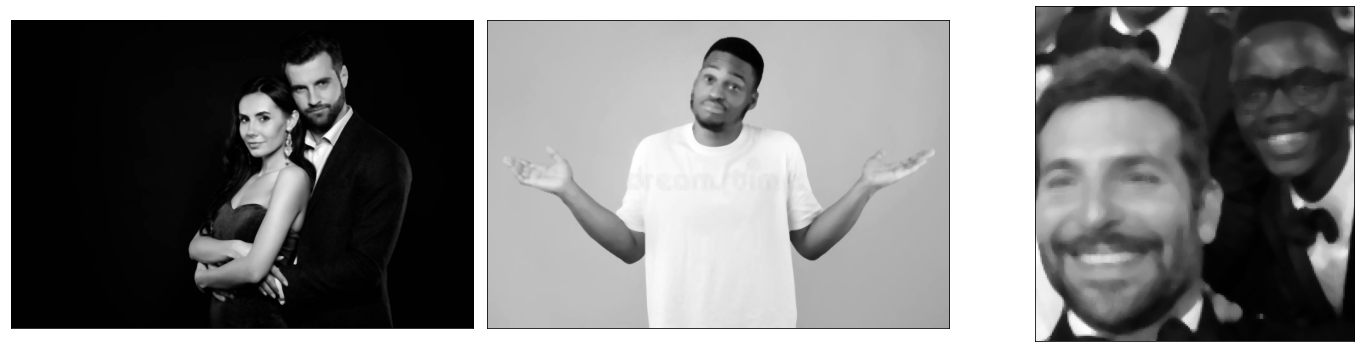

In [32]:
img = cv2.imread('images/coppia.jpeg') 
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)

img2 = cv2.imread('images/boyazure.jpeg') 
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.medianBlur(img3,5)

img4 = cv2.imread('images/BC.jpeg') 
img5 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img5 = cv2.medianBlur(img5,5)

images = [img1, img3, img5]
plt.figure(figsize=(20,5))
for i in range(3):
   plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
   plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

## Sogliatura
- SOGLIATURA GLOBALE
  É il metodo più semplice e prevede la scelta di un determinato valore di soglia, compreso tra 0 e 255 (nel nostro caso abbiamo preso il valore mediano, 127). L’algoritmo di sogliatura prevede quindi la scansione di ogni pixel dell’immagine e, nel caso in cui il valore del pixel esaminato sia minore del valore di soglia, tale pixel assumerà valore zero, che corrisponde al colore nero. Altrimenti, nel caso in cui il valore del pixel esaminato sia maggiore o uguale del valore di soglia, tale pixel assumerà valore 255, che corrisponde al colore bianco.
  Il metodo descritto risulta adatto se le immagini in analisi presentano più o meno le stesse caratteristiche in termini di illuminazione e contrasto.

- SOGLIATURA ADATTIVA
  Questo metodo consente di sopperire alle mancanze della sogliatura globale, nel caso in cui le immagini in analisi presentino illuminazione e/o contrasto non uniforme. In particolare, questa tecnica dinamica computa automaticamente differenti valori di soglia per diverse aree dell’immagine. Dunque, l’immagine viene suddivisa in tante sotto-immagini, abbastanza piccole da poter ipotizzare che in ciascun sotto-immagine illuminazione e contrasto siano sufficientemente uniformi. Una volta suddivisa l’immagine, un valore di soglia viene calcolato per ciascuna sotto-immagine.

    - Media dei valori dei pixel della sotto-immagine
    - Mediana dei valori dei pixel della sotto-immagine
    - Media fra valore massimo e minimo dei pixel della sotto-immagine


La libreria OpenCV implementa un ulteriore tipologia di calcolo del valore di soglia, per quanto riguarda la sogliatura adattativa, ovvero una somma pesata dei valori dei pixel di ciascuna sotto-immagine, in cui i pesi sono rappresentati da una finestra Gaussiana.


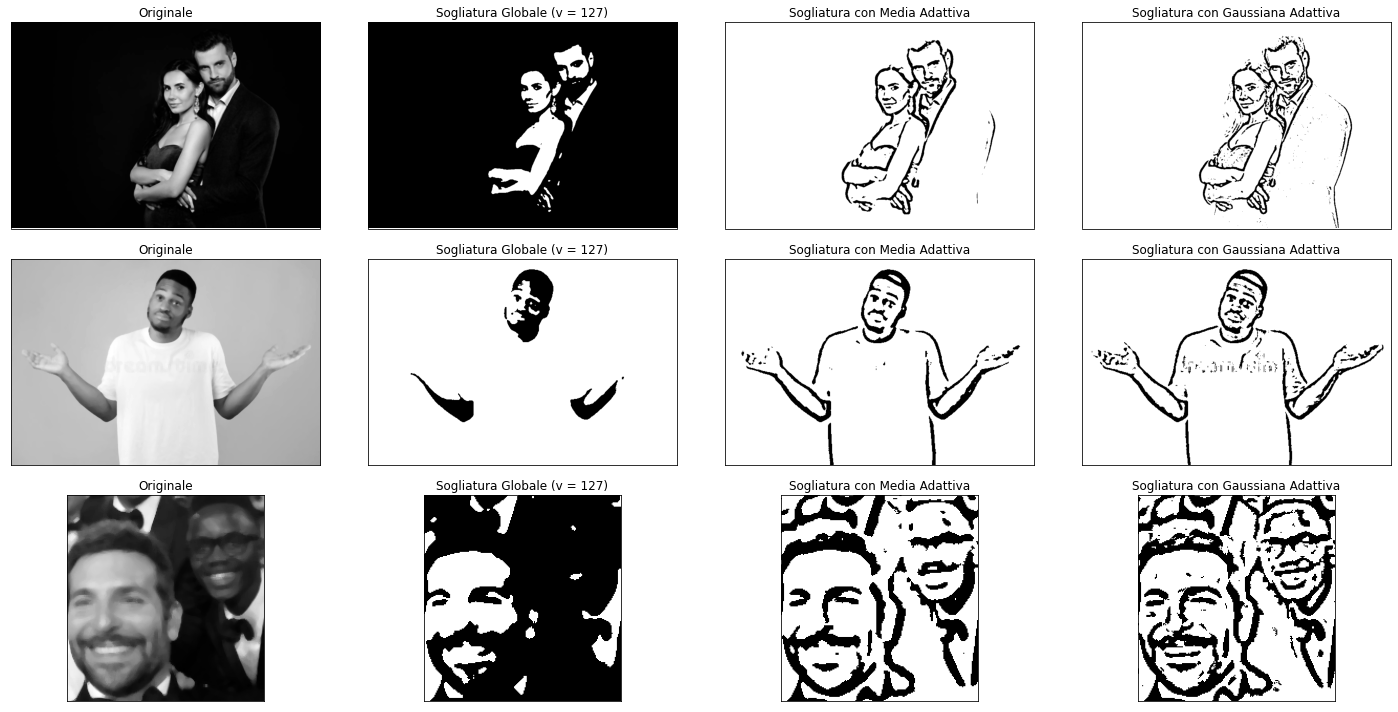

In [33]:
ret,globale = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
media = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
gaussiana = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

ret,glob3 = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)
med3 = cv2.adaptiveThreshold(img3, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
gauss3 = cv2.adaptiveThreshold(img3, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

ret,glob5 = cv2.threshold(img5,127,255,cv2.THRESH_BINARY)
med5 = cv2.adaptiveThreshold(img5, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
gauss5 = cv2.adaptiveThreshold(img5, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

titles = ['Originale', 'Sogliatura Globale (v = 127)', 'Sogliatura con Media Adattiva', 'Sogliatura con Gaussiana Adattiva', 
         'Originale', 'Sogliatura Globale (v = 127)', 'Sogliatura con Media Adattiva', 'Sogliatura con Gaussiana Adattiva', 
         'Originale', 'Sogliatura Globale (v = 127)', 'Sogliatura con Media Adattiva', 'Sogliatura con Gaussiana Adattiva']
plt.figure(figsize=(20,10))

images = [img1, globale, media, gaussiana, img3, glob3, med3, gauss3, img5, glob5, med5, gauss5]

for i in range(12):
   plt.subplot(3,4,i+1),plt.imshow(images[i],'gray')
   plt.title(titles[i])
   plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

## Conversione in HSV
Lo spazio HSV è definito in un modo simile a come gli esseri umani percepiscono il colore. Si basa su tre valori: tonalità, saturazione e valore. 
Questo spazio di colore descrive i colori (tonalità o tinta) in termini di tonalità (saturazione o quantità di grigio) e il loro valore di luminosità.

- HUE:
Indica la porzione di colore del modello di colore, espressa come un numero compreso tra 0 e 360 ​​gradi:

    Rosso	    0-60
    Giallo	    60-20
    verde	    120-180
    Ciano	    180-240
    Blu	        240-300
    Magenta	    300-360

- SATURAZIONE:
La saturazione è la quantità di grigio nel colore, da 0 a 100 percento. Ridurre la saturazione verso zero per introdurre più grigio produce un effetto sbiadito.

- VALORE (o luminosità):
Il valore funziona in combinazione con la saturazione e descrive la luminosità o l'intensità del colore, da 0 a 100 percento, dove 0 è completamente nero e 100 è il più luminoso e rivela il maggior numero di colori.


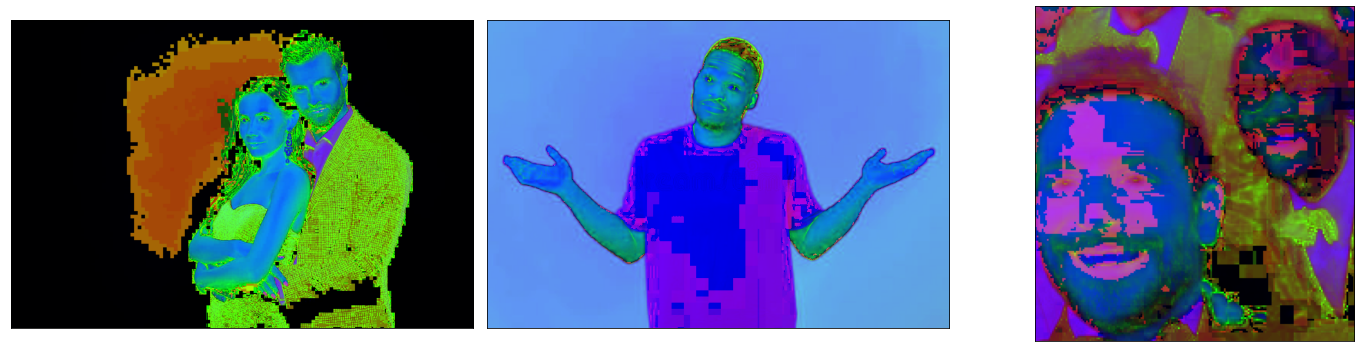

In [34]:
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HSV_img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
HSV_img5 = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(20,5))

images = [HSV_img, HSV_img3, HSV_img5]
for i in range(3):
   plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
   plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

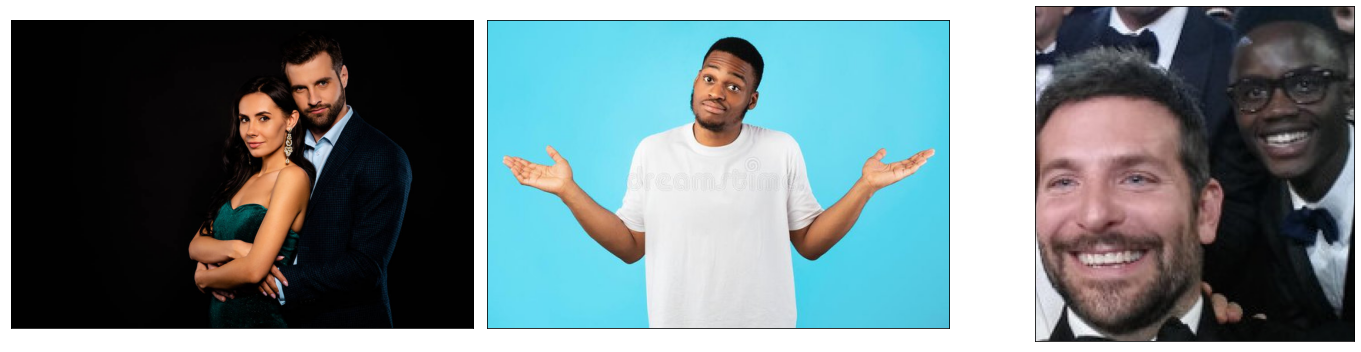

In [35]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
RGB_img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
RGB_img5 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,5))

images = [RGB_img, RGB_img3, RGB_img5]
for i in range(3):
   plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
   plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

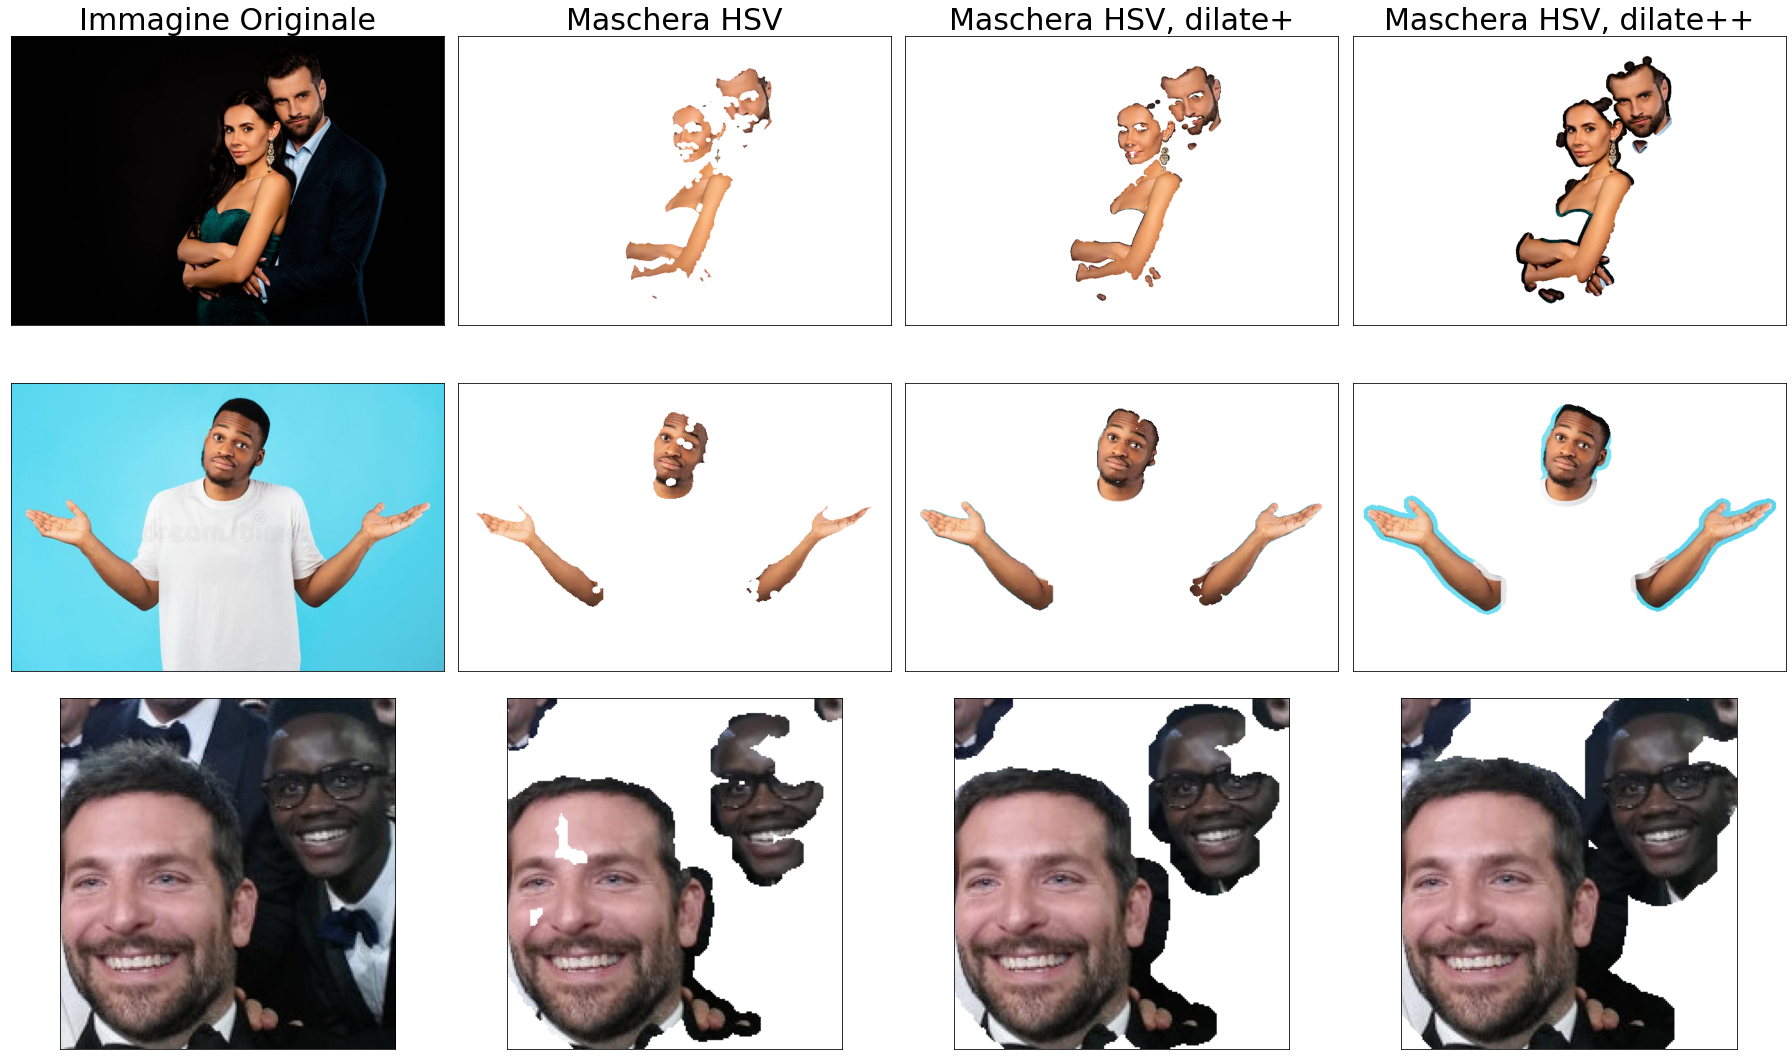

In [36]:
#limite inferiore e superiore di valori HSV per la pelle
lower = np.array([0, 36, 40],np.uint8)
upper = np.array([61, 160, 255],np.uint8)

#crea maschera pelle prima foto
skinMask = cv2.inRange(HSV_img, lower, upper)
skinMask2 = cv2.inRange(HSV_img, lower, upper)
skinMask3 = cv2.inRange(HSV_img, lower, upper)

#crea maschera pelle seconda foto
skinMask4 = cv2.inRange(HSV_img3, lower, upper)
skinMask5 = cv2.inRange(HSV_img3, lower, upper)
skinMask6 = cv2.inRange(HSV_img3, lower, upper)

#crea maschera pelle terza foto
skinMask7 = cv2.inRange(HSV_img5, lower, upper)
skinMask8 = cv2.inRange(HSV_img5, lower, upper)
skinMask9 = cv2.inRange(HSV_img5, lower, upper)



# blur sulla maschera per ridurre il rumore (1)
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skinMask2 = cv2.GaussianBlur(skinMask2, (3, 3), 0)
skinMask3 = cv2.GaussianBlur(skinMask2, (3, 3), 0)

# blur sulla maschera per ridurre il rumore (2)
skinMask4 = cv2.GaussianBlur(skinMask4, (3, 3), 0)
skinMask5 = cv2.GaussianBlur(skinMask5, (3, 3), 0)
skinMask6 = cv2.GaussianBlur(skinMask5, (3, 3), 0)

# blur sulla maschera per ridurre il rumore (3)
skinMask7 = cv2.GaussianBlur(skinMask7, (3, 3), 0)
skinMask8 = cv2.GaussianBlur(skinMask8, (3, 3), 0)
skinMask9 = cv2.GaussianBlur(skinMask8, (3, 3), 0)

#approssimazione della maschera
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

#filtri morfologici (erodi per gli occhi e narici, dilata per prendere più pixel) (1)
skinMask = cv2.erode(skinMask, kernel, iterations = 1)
skinMask = cv2.dilate(skinMask, kernel, iterations = 0)

skinMask2 = cv2.erode(skinMask2, kernel, iterations = 1)
skinMask2 = cv2.dilate(skinMask2, kernel, iterations = 1)

skinMask3 = cv2.erode(skinMask3, kernel, iterations = 1)
skinMask3 = cv2.dilate(skinMask3, kernel, iterations = 2)

#filtri morfologici (erodi per gli occhi e narici, dilata per prendere più pixel) (2)
skinMask4 = cv2.erode(skinMask4, kernel, iterations = 1)
skinMask4 = cv2.dilate(skinMask4, kernel, iterations = 0)

skinMask5 = cv2.erode(skinMask5, kernel, iterations = 1)
skinMask5 = cv2.dilate(skinMask5, kernel, iterations = 1)

skinMask6 = cv2.erode(skinMask6, kernel, iterations = 1)
skinMask6 = cv2.dilate(skinMask6, kernel, iterations = 2)

#filtri morfologici (erodi per gli occhi e narici, dilata per prendere più pixel) (2)
skinMask7 = cv2.erode(skinMask7, kernel, iterations = 0)
skinMask7 = cv2.dilate(skinMask7, kernel, iterations = 1)

skinMask8 = cv2.erode(skinMask8, kernel, iterations = 0)
skinMask8 = cv2.dilate(skinMask8, kernel, iterations = 2)

skinMask9 = cv2.erode(skinMask9, kernel, iterations = 0)
skinMask9 = cv2.dilate(skinMask9, kernel, iterations = 3)

#applicazione della maschera tramite il bitwise (1)
skin = cv2.bitwise_not(img, mask = skinMask)
skin = cv2.bitwise_not(skin, mask = None)
skin = cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)

skin2 = cv2.bitwise_not(img, mask = skinMask2)
skin2 = cv2.bitwise_not(skin2, mask = None)
skin2 = cv2.cvtColor(skin2, cv2.COLOR_BGR2RGB)

skin3 = cv2.bitwise_not(img, mask = skinMask3)
skin3 = cv2.bitwise_not(skin3, mask = None)
skin3 = cv2.cvtColor(skin3, cv2.COLOR_BGR2RGB)

#applicazione della maschera tramite il bitwise (2)
skin4 = cv2.bitwise_not(img2, mask = skinMask4)
skin4 = cv2.bitwise_not(skin4, mask = None)
skin4 = cv2.cvtColor(skin4, cv2.COLOR_BGR2RGB)

skin5 = cv2.bitwise_not(img2, mask = skinMask5)
skin5 = cv2.bitwise_not(skin5, mask = None)
skin5 = cv2.cvtColor(skin5, cv2.COLOR_BGR2RGB)

skin6 = cv2.bitwise_not(img2, mask = skinMask6)
skin6 = cv2.bitwise_not(skin6, mask = None)
skin6 = cv2.cvtColor(skin6, cv2.COLOR_BGR2RGB)

#applicazione della maschera tramite il bitwise (3)
skin7 = cv2.bitwise_not(img4, mask = skinMask7)
skin7 = cv2.bitwise_not(skin7, mask = None)
skin7 = cv2.cvtColor(skin7, cv2.COLOR_BGR2RGB)

skin8 = cv2.bitwise_not(img4, mask = skinMask8)
skin8 = cv2.bitwise_not(skin8, mask = None)
skin8 = cv2.cvtColor(skin8, cv2.COLOR_BGR2RGB)

skin9 = cv2.bitwise_not(img4, mask = skinMask9)
skin9 = cv2.bitwise_not(skin9, mask = None)
skin9 = cv2.cvtColor(skin9, cv2.COLOR_BGR2RGB)


titles = ['Immagine Originale', 'Maschera HSV', 'Maschera HSV, dilate+', 'Maschera HSV, dilate++', '','','','','','','','']
images = [RGB_img, skin, skin2, skin3,
          RGB_img3, skin4, skin5, skin6,
          RGB_img5, skin7, skin8, skin9] 

plt.figure(figsize=(25,15))
for i in range(12):
    plt.subplot(3,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize = 30)
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

## YCrCb
- Y Luminosità 
- Cb crominanza del blu 
- Cr crominanza del rosso

Utilizzato principalmente nella fotografia digitale.

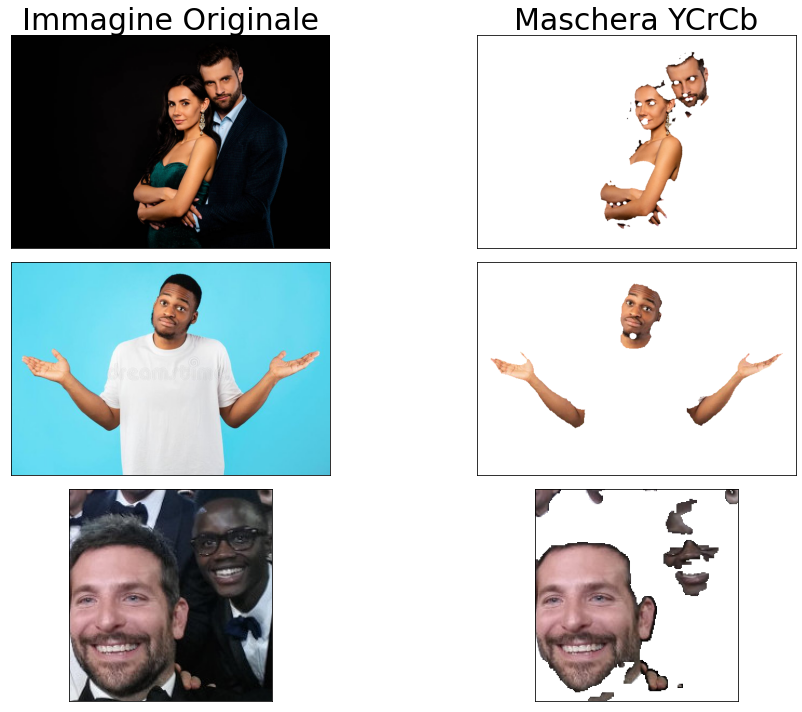

In [37]:
#valori limite per la pelle
min_YCrCb = np.array([0, 133, 0],np.uint8)
max_YCrCb = np.array([255, 180, 190],np.uint8)

#lettura immagine
image = cv2.imread("images/coppia.jpeg")
originale = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  #servirà per la stampa dell'originale a colori
imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)   

image22 = cv2.imread("images/boyazure.jpeg")
originale2 = cv2.cvtColor(image22,cv2.COLOR_BGR2RGB) 
imageYCrCb2 = cv2.cvtColor(image22,cv2.COLOR_BGR2YCR_CB)   

image23 = cv2.imread("images/BC.jpeg")
originale3 = cv2.cvtColor(image23,cv2.COLOR_BGR2RGB) 
imageYCrCb3 = cv2.cvtColor(image23,cv2.COLOR_BGR2YCR_CB)   

#maschera pelle
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb) # (1)
skinRegionYCrCb2 = cv2.inRange(imageYCrCb2,min_YCrCb,max_YCrCb) # (2)
skinRegionYCrCb3 = cv2.inRange(imageYCrCb3,min_YCrCb,max_YCrCb) # (3)

# blur 
skinRegionYCrCb = cv2.GaussianBlur(skinRegionYCrCb, (3, 3), 0) # (1)
skinRegionYCrCb2 = cv2.GaussianBlur(skinRegionYCrCb2, (3, 3), 0) # (2)
skinRegionYCrCb3 = cv2.GaussianBlur(skinRegionYCrCb3, (3, 3), 0) # (3)

#approssima maschera
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinRegionYCrCb = cv2.dilate(skinRegionYCrCb, kernel, iterations = 0) # (1)
skinRegionYCrCb = cv2.erode(skinRegionYCrCb, kernel, iterations = 1)

skinRegionYCrCb2 = cv2.dilate(skinRegionYCrCb2, kernel, iterations = 0) # (2)
skinRegionYCrCb2 = cv2.erode(skinRegionYCrCb2, kernel, iterations = 1)

skinRegionYCrCb3 = cv2.dilate(skinRegionYCrCb3, kernel, iterations = 0) # (3)
skinRegionYCrCb3 = cv2.erode(skinRegionYCrCb3, kernel, iterations = 0)


#applica maschera
skin2 = cv2.bitwise_not(image, mask = skinRegionYCrCb)
skin2 = cv2.bitwise_not(skin2, image, mask = None)
skin2 = cv2.cvtColor(skin2,cv2.COLOR_BGR2RGB)

#applica maschera
skin22 = cv2.bitwise_not(image22, mask = skinRegionYCrCb2)
skin22 = cv2.bitwise_not(skin22, image22, mask = None)
skin22 = cv2.cvtColor(skin22,cv2.COLOR_BGR2RGB)

#applica maschera
skin23 = cv2.bitwise_not(image23, mask = skinRegionYCrCb3)
skin23 = cv2.bitwise_not(skin23, image23, mask = None)
skin23 = cv2.cvtColor(skin23,cv2.COLOR_BGR2RGB)

titles = ['Immagine Originale', 'Maschera YCrCb', '', '', '', '']
images = [originale, skin2, originale2, skin22, originale3, skin23]

plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize = 30)
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()


## Considerazioni finali

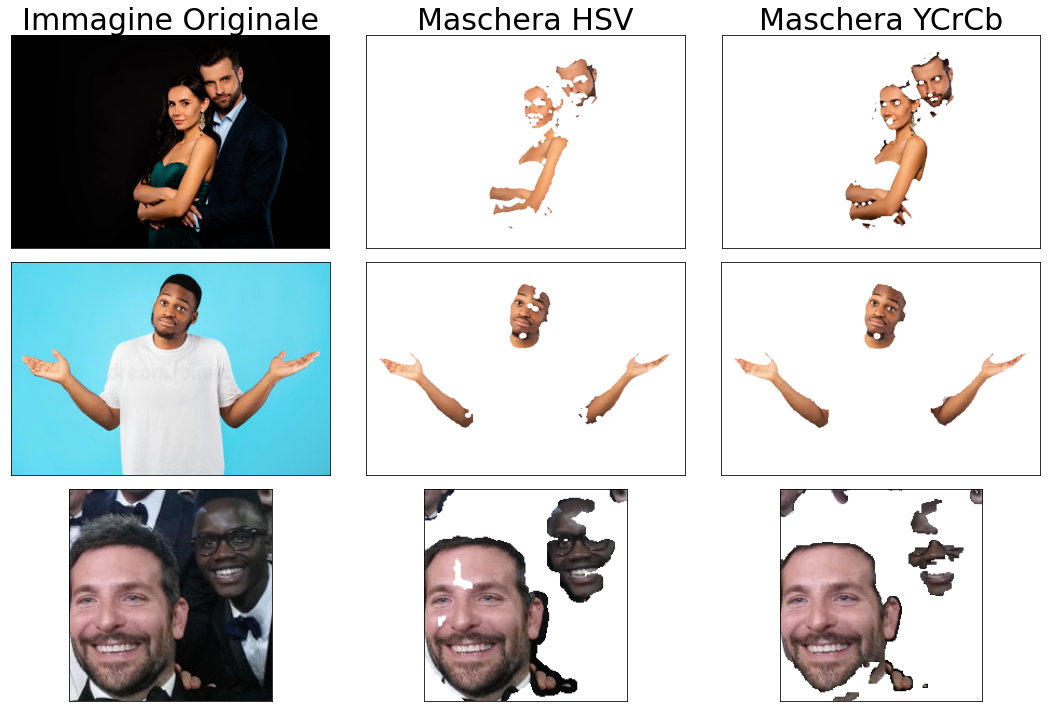

In [38]:
titles = ['Immagine Originale', 'Maschera HSV', 'Maschera YCrCb', '', '', '', '', '', '']
images = [originale, skin, skin2, originale2, skin4, skin22, originale3, skin7, skin23 ]

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize = 30)
    plt.xticks([]),plt.yticks([])
plt.tight_layout()
plt.show()

Provando con varie fotografie diverse si ha potuto evidenziare come i limiti minimi e massimi degli spazi di colore usati vadano ritoccati nel dettaglio per ciascuna foto e non possono essere usati come standard: anche solo una luminosità della foto troppo intensa può portare ad avere risultati grossolani o del tutto errati.
Inoltre, i filtri morfologici quale l'erosione e la dilatazione non possono essere iterati lo stesso numero di volte per ogni immagine mantenendo tali limiti preimpostati, necessitano comunque di un ritocco.

In sostanza, i filtri morfologici in alcuni casi possono venirci in aiuto, ma per scendere nel dettaglio bisogna modificare i limiti minimi e massimi.

# Campionamento di immagini e valori medi
Ho voluto analizzare tramite grafici immagini contenenti porzioni di pelle e di non pelle, in modo da capire come possano variare i valori dei canali RGB tra le diverse tonalità della pelle e come si possa distinguere una texture di pelle e una di non pelle, campionando per ciascuna il valore medio di ogni canale RGB.

## Texture con porzioni di pelle

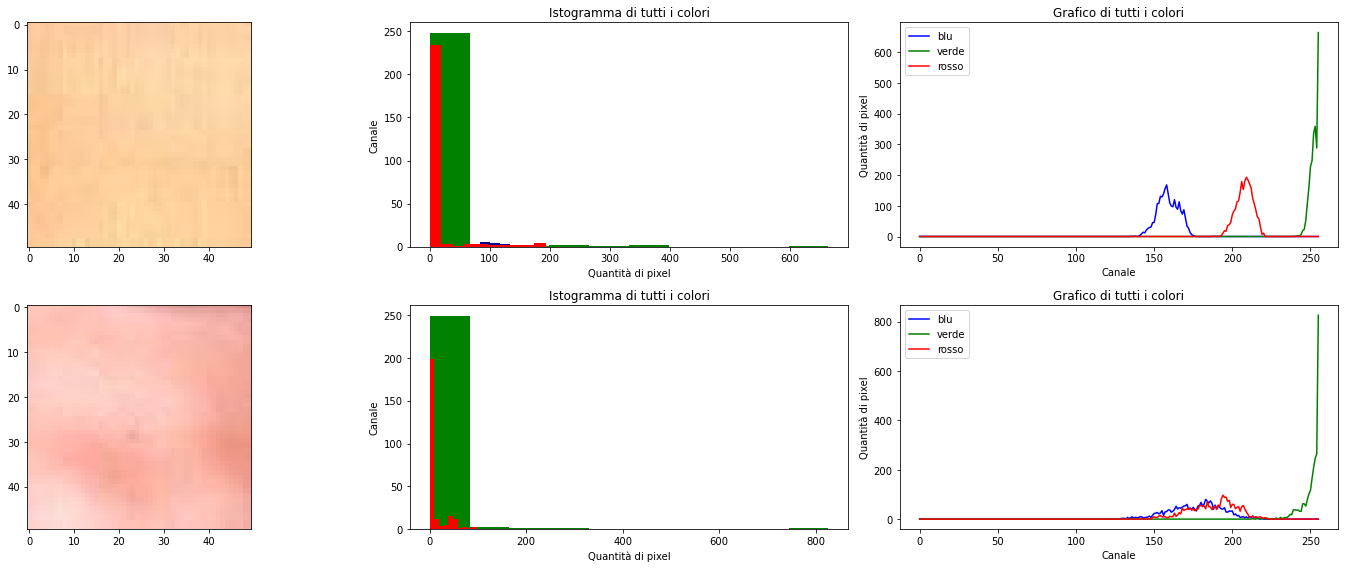

In [39]:
img = cv2.imread('skin/pelle10.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img], [1], None, [256], [0, 256])
verde = cv2.calcHist([img], [2], None, [256], [0, 256]) 
ch1 = cv2.mean(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.imshow(img)

plt.subplot(2,3,2)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,3)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 


img2 = cv2.imread('skin/pelle8.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img2], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img2], [1], None, [256], [0, 256])
verde = cv2.calcHist([img2], [2], None, [256], [0, 256]) 
ch2 = cv2.mean(img2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(2,3,4)
plt.imshow(img2)
plt.subplot(2,3,5)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,6)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 
plt.tight_layout()
plt.show()


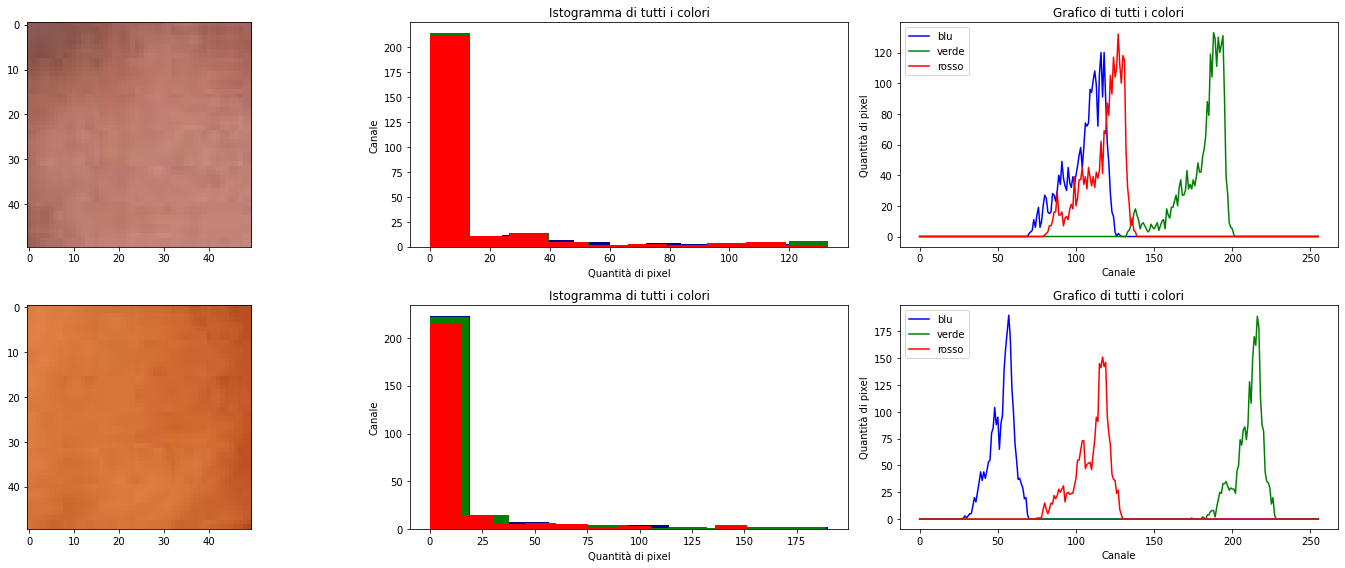

In [40]:
img3 = cv2.imread('skin/pelle9.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img3], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img3], [1], None, [256], [0, 256])
verde = cv2.calcHist([img3], [2], None, [256], [0, 256]) 


ch3 = cv2.mean(img3)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.imshow(img3)
plt.subplot(2,3,2)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,3)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')

img4 = cv2.imread('skin/pelle32.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img4], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img4], [1], None, [256], [0, 256])
verde = cv2.calcHist([img4], [2], None, [256], [0, 256]) 


ch4 = cv2.mean(img4)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.subplot(2,3,4)
plt.imshow(img4)

plt.subplot(2,3,5)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,6)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 
plt.tight_layout()
plt.show()


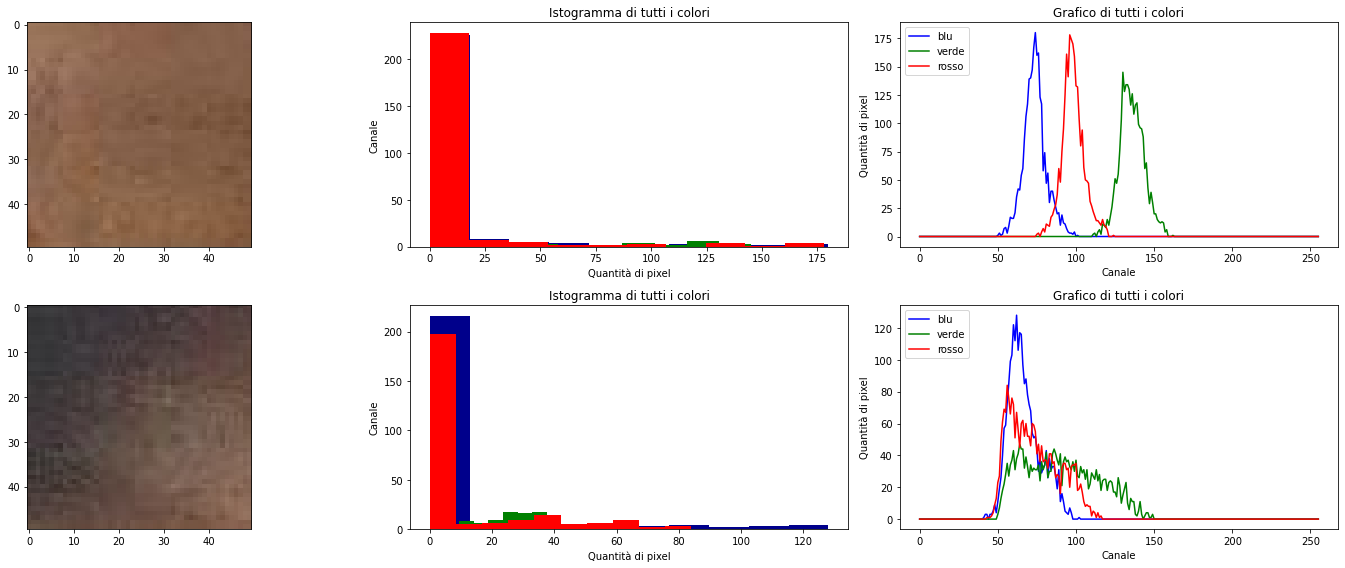

In [41]:
img5 = cv2.imread('skin/pelle19.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img5], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img5], [1], None, [256], [0, 256])
verde = cv2.calcHist([img5], [2], None, [256], [0, 256]) 


ch5 = cv2.mean(img5)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.imshow(img5)
plt.subplot(2,3,2)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,3)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')

img6 = cv2.imread('skin/pelle21.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img6], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img6], [1], None, [256], [0, 256])
verde = cv2.calcHist([img6], [2], None, [256], [0, 256]) 


ch6 = cv2.mean(img6)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
plt.subplot(2,3,4)
plt.imshow(img6)
plt.subplot(2,3,5)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,6)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
plt.tight_layout()
plt.show()


## Texture senza pelle

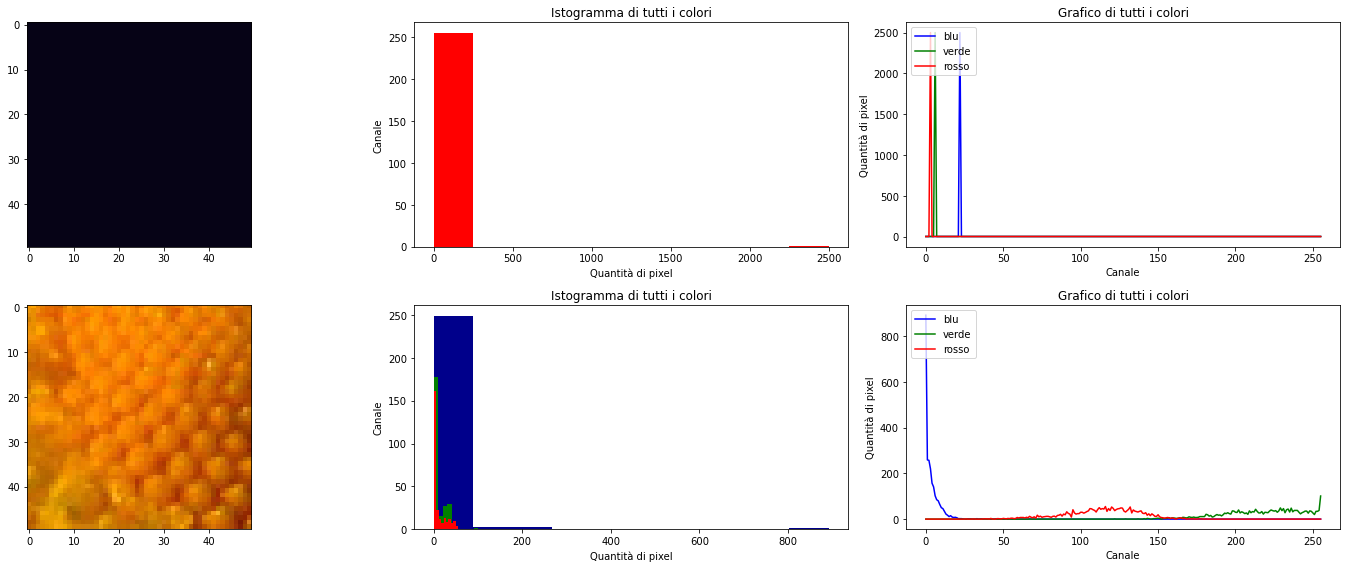

In [42]:
img7 = cv2.imread('nonskin/sweat8.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img7], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img7], [1], None, [256], [0, 256])
verde = cv2.calcHist([img7], [2], None, [256], [0, 256]) 
ch7 = cv2.mean(img7)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.imshow(img7)

plt.subplot(2,3,2)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,3)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 


img8 = cv2.imread('nonskin/sweat12.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img8], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img8], [1], None, [256], [0, 256])
verde = cv2.calcHist([img8], [2], None, [256], [0, 256]) 
ch8 = cv2.mean(img8)
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)

plt.subplot(2,3,4)
plt.imshow(img8)
plt.subplot(2,3,5)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,6)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 
plt.tight_layout()
plt.show()


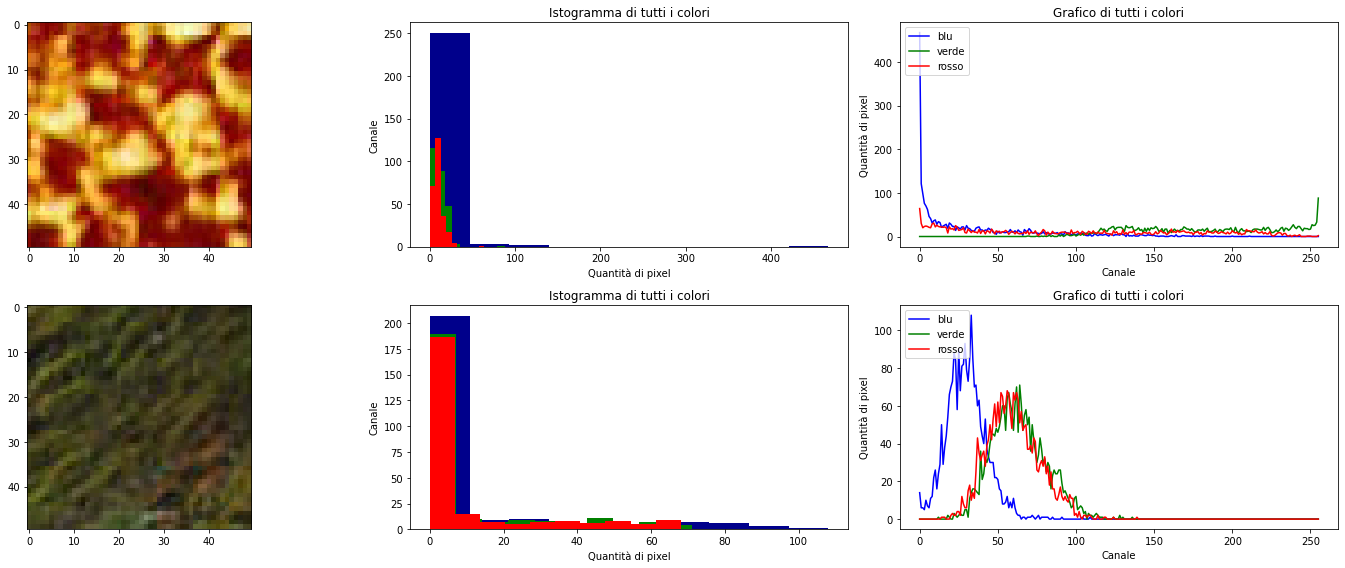

In [43]:
img9 = cv2.imread('nonskin/sweat22.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img9], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img9], [1], None, [256], [0, 256])
verde = cv2.calcHist([img9], [2], None, [256], [0, 256]) 
ch9 = cv2.mean(img9)
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.imshow(img9)

plt.subplot(2,3,2)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,3)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 


img10 = cv2.imread('nonskin/sweat25.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img10], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img10], [1], None, [256], [0, 256])
verde = cv2.calcHist([img10], [2], None, [256], [0, 256]) 
ch10 = cv2.mean(img10)
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)

plt.subplot(2,3,4)
plt.imshow(img10)
plt.subplot(2,3,5)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,6)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 
plt.tight_layout()
plt.show()

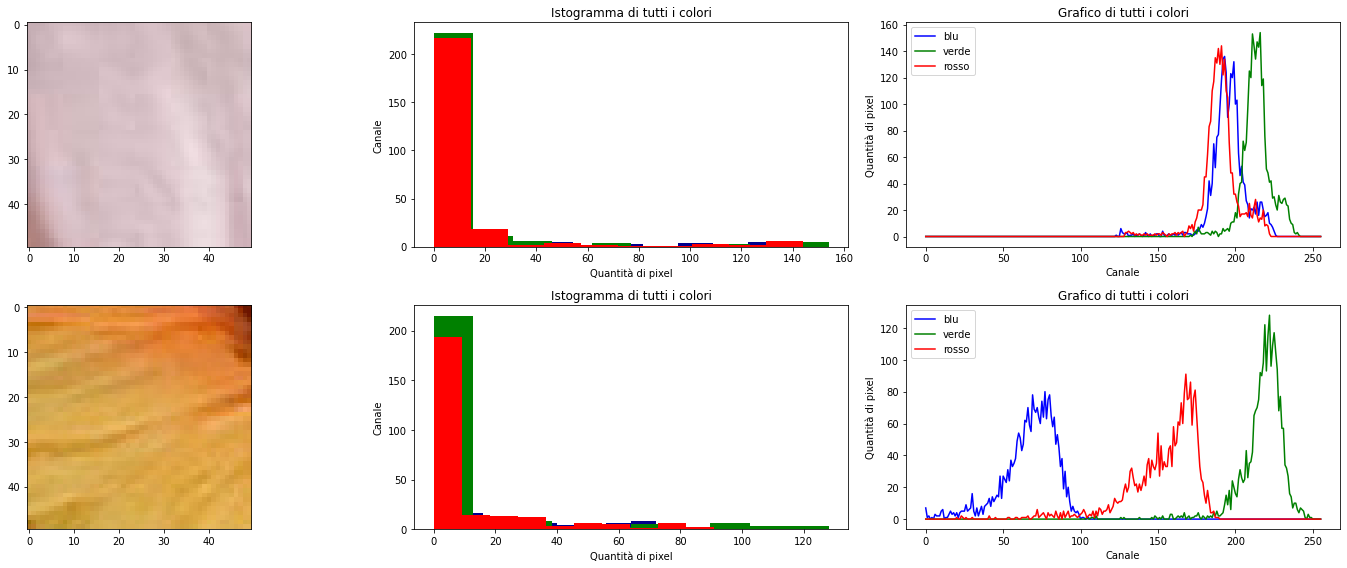

In [44]:
img11 = cv2.imread('nonskin/sweat2.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img11], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img11], [1], None, [256], [0, 256])
verde = cv2.calcHist([img11], [2], None, [256], [0, 256]) 
ch11 = cv2.mean(img11)
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.imshow(img11)

plt.subplot(2,3,2)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,3)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 


img12 = cv2.imread('nonskin/sweat29.jpg', cv2.IMREAD_COLOR)
blu = cv2.calcHist([img12], [0], None, [256], [0, 256])
rosso = cv2.calcHist([img12], [1], None, [256], [0, 256])
verde = cv2.calcHist([img12], [2], None, [256], [0, 256]) 
ch12 = cv2.mean(img12)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)

plt.subplot(2,3,4)
plt.imshow(img12)
plt.subplot(2,3,5)
plt.title("Istogramma di tutti i colori")
plt.hist(blu,color="darkblue")
plt.hist(verde,color="green")
plt.hist(rosso,color="red")
plt.xlabel('Quantità di pixel')
plt.ylabel('Canale')
 
plt.subplot(2,3,6)
plt.title("Grafico di tutti i colori")
plt.plot(blu, "-b", label = "blu")
plt.plot(verde, "-g", label = "verde")
plt.plot(rosso, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.ylabel('Quantità di pixel')
plt.xlabel('Canale')
 
plt.tight_layout()
plt.show()

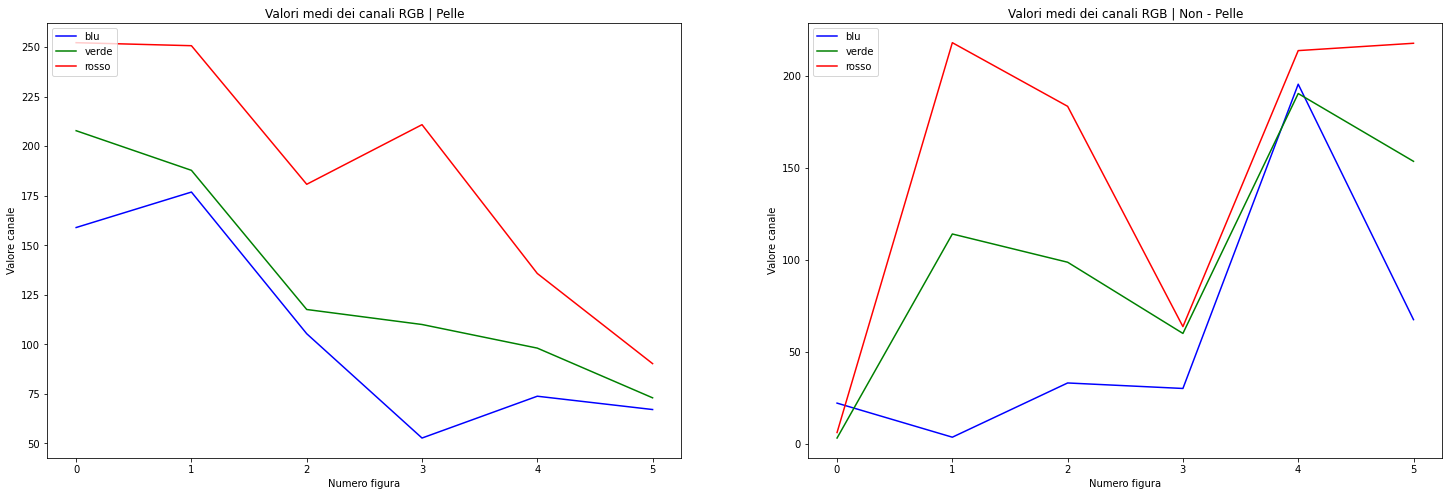

In [45]:
chp_r = np.array([ch1[2], ch2[2], ch3[2], ch4[2], ch5[2], ch6[2]])
chp_g = np.array([ch1[1], ch2[1], ch3[1], ch4[1], ch5[1], ch6[1]])
chp_b = np.array([ch1[0], ch2[0], ch3[0], ch4[0], ch5[0], ch6[0]])

plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
plt.title('Valori medi dei canali RGB | Pelle',fontsize=12)
plt.plot(chp_b, "-b", label = "blu")
plt.plot(chp_g, "-g", label = "verde")
plt.plot(chp_r, "-r", label = "rosso")
plt.legend(loc = 'upper left')
plt.xlabel("Numero figura")
plt.ylabel("Valore canale")

chnp_r2 = np.array([ch7[2], ch8[2], ch9[2], ch10[2], ch11[2], ch12[2]])
chnp_g2 = np.array([ch7[1], ch8[1], ch9[1], ch10[1], ch11[1], ch12[1]])
chnp_b2 = np.array([ch7[0], ch8[0], ch9[0], ch10[0], ch11[0], ch12[0]])

plt.subplot(1,2,2)
plt.title('Valori medi dei canali RGB | Non - Pelle',fontsize=12)
plt.plot(chnp_b2, "-b", label = "blu")
plt.plot(chnp_g2, "-g", label = "verde")
plt.plot(chnp_r2, "-r", label = "rosso")
plt.xlabel("Numero figura")
plt.ylabel("Valore canale")
_ = plt.legend(loc = 'upper left')



# Lettura dei grafici e considerazioni finali
Campionando porzioni di pelle molto chiara (probabilmente esposta ad un'alta intensità di luce), ho notato come ci fossero dei picchi di alti valori di verde, mentre cambiando tonalità inizi a prevalere il blu sul verde.

Come possiamo notare dai plot delle texture, la differenza tra texture di pelle e quelle non-pelle consiste nella disposizione dei valori medi di ciascun canale: 
- Nelle texture di pelle la disposizione è uniforme, il rosso ha valori medi più alti degli altri canali ed in ogni foto il verde ha sempre valori tra il rosso ed il blu.
- In quelle dove non è presente pelle invece i valori non sono uniformi, si intersecano e nelle foto prese come campione tendenzialmente si hanno valori di colore più bassi rispetto alle texture di pelle ( < 50)